In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import import_ipynb
import EDA_performance_yearly

# Read dataset
file_path = "Study Case DA (1).xlsx"

In [ ]:
# Menampilkan semua kolom tanpa terpotong
pd.set_option('display.max_columns', None)

In [76]:
psych = pd.read_excel(file_path, sheet_name="profiles_psych")
papi = pd.read_excel(file_path, sheet_name="papi_scores")

In [77]:
# Misal dataframe awal 'papi' punya kolom: ['employee', 'scale_code', 'score']

papi_wide = papi.pivot(index='employee_id', columns='scale_code', values='score').reset_index()

display(papi_wide.head())


scale_code,employee_id,Papi_A,Papi_B,Papi_C,Papi_D,Papi_E,Papi_F,Papi_G,Papi_I,Papi_K,Papi_L,Papi_N,Papi_O,Papi_P,Papi_R,Papi_S,Papi_T,Papi_V,Papi_W,Papi_X,Papi_Z
0,DUP1942,6.0,NaN,1.0,4.0,3.0,5.0,4.0,1.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,9.0,1.0,8.0,3.0,NaN
1,DUP2096,1.0,6.0,9.0,3.0,4.0,1.0,2.0,6.0,9.0,3.0,1.0,4.0,4.0,6.0,8.0,2.0,6.0,3.0,8.0,2.0
2,DUP2722,2.0,NaN,6.0,4.0,1.0,4.0,9.0,9.0,1.0,3.0,8.0,2.0,NaN,6.0,1.0,7.0,3.0,6.0,3.0,3.0
3,DUP3015,5.0,4.0,3.0,4.0,9.0,2.0,8.0,9.0,1.0,7.0,5.0,1.0,8.0,7.0,3.0,NaN,NaN,3.0,5.0,3.0
4,DUP3452,7.0,9.0,1.0,9.0,7.0,3.0,NaN,2.0,1.0,4.0,NaN,NaN,4.0,2.0,9.0,NaN,9.0,1.0,6.0,4.0


In [78]:
psych['mbti'] = psych['mbti'].str.upper()
psych = psych.drop(columns=['disc_word'])


In [79]:
for year in range(2021, 2025 + 1):
    # Ambil performance per tahun
    df_perf = getattr(EDA_performance_yearly, f"performance_{year}")

    # Merge dengan PAPI
    df_merged = df_perf.merge(
        papi_wide,
        on="employee_id",
        how="inner"
    )

    # Merge dengan psychometric profile
    df_merged = df_merged.merge(
        psych,
        on="employee_id",
        how="inner"
    )

    # Simpan ke globals
    globals()[f"full_data_{year}"] = df_merged


In [80]:
dfs = [
    (full_data_2021, 2021),
    (full_data_2022, 2022),
    (full_data_2023, 2023),
    (full_data_2024, 2024),
    (full_data_2025, 2025),
]

for df, year in dfs:
    # tambahkan kolom is_high
    df['is_high'] = (df['rating'] == 5).astype(int)

In [81]:
# 1️⃣ Nama semua kolom
print(full_data_2021.columns.tolist())

# 2️⃣ Unique values per kolom
for col in full_data_2021.columns:
    unique_vals = full_data_2021[col].dropna().unique()
    print(f"Column: {col}, Unique values: {unique_vals}")


['employee_id', 'rating', 'year', 'Papi_A', 'Papi_B', 'Papi_C', 'Papi_D', 'Papi_E', 'Papi_F', 'Papi_G', 'Papi_I', 'Papi_K', 'Papi_L', 'Papi_N', 'Papi_O', 'Papi_P', 'Papi_R', 'Papi_S', 'Papi_T', 'Papi_V', 'Papi_W', 'Papi_X', 'Papi_Z', 'pauli', 'faxtor', 'disc', 'mbti', 'iq', 'gtq', 'tiki', 'is_high']
Column: employee_id, Unique values: ['EMP100000' 'EMP100002' 'EMP100004' ... 'DUP2096' 'DUP4177' 'DUP3452']
Column: rating, Unique values: [2. 3. 4. 5. 1.]
Column: year, Unique values: [2021]
Column: Papi_A, Unique values: [1. 2. 5. 7. 4. 3. 6. 8. 9.]
Column: Papi_B, Unique values: [6. 4. 9. 2. 7. 5. 8. 3. 1.]
Column: Papi_C, Unique values: [5. 4. 6. 2. 9. 7. 1. 3. 8.]
Column: Papi_D, Unique values: [2. 5. 4. 3. 9. 6. 7. 8. 1.]
Column: Papi_E, Unique values: [1. 5. 3. 6. 2. 8. 9. 4. 7.]
Column: Papi_F, Unique values: [3. 7. 1. 6. 8. 4. 9. 5. 2.]
Column: Papi_G, Unique values: [5. 2. 8. 9. 1. 6. 4. 3. 7.]
Column: Papi_I, Unique values: [8. 9. 3. 7. 4. 1. 2. 6. 5.]
Column: Papi_K, Unique valu

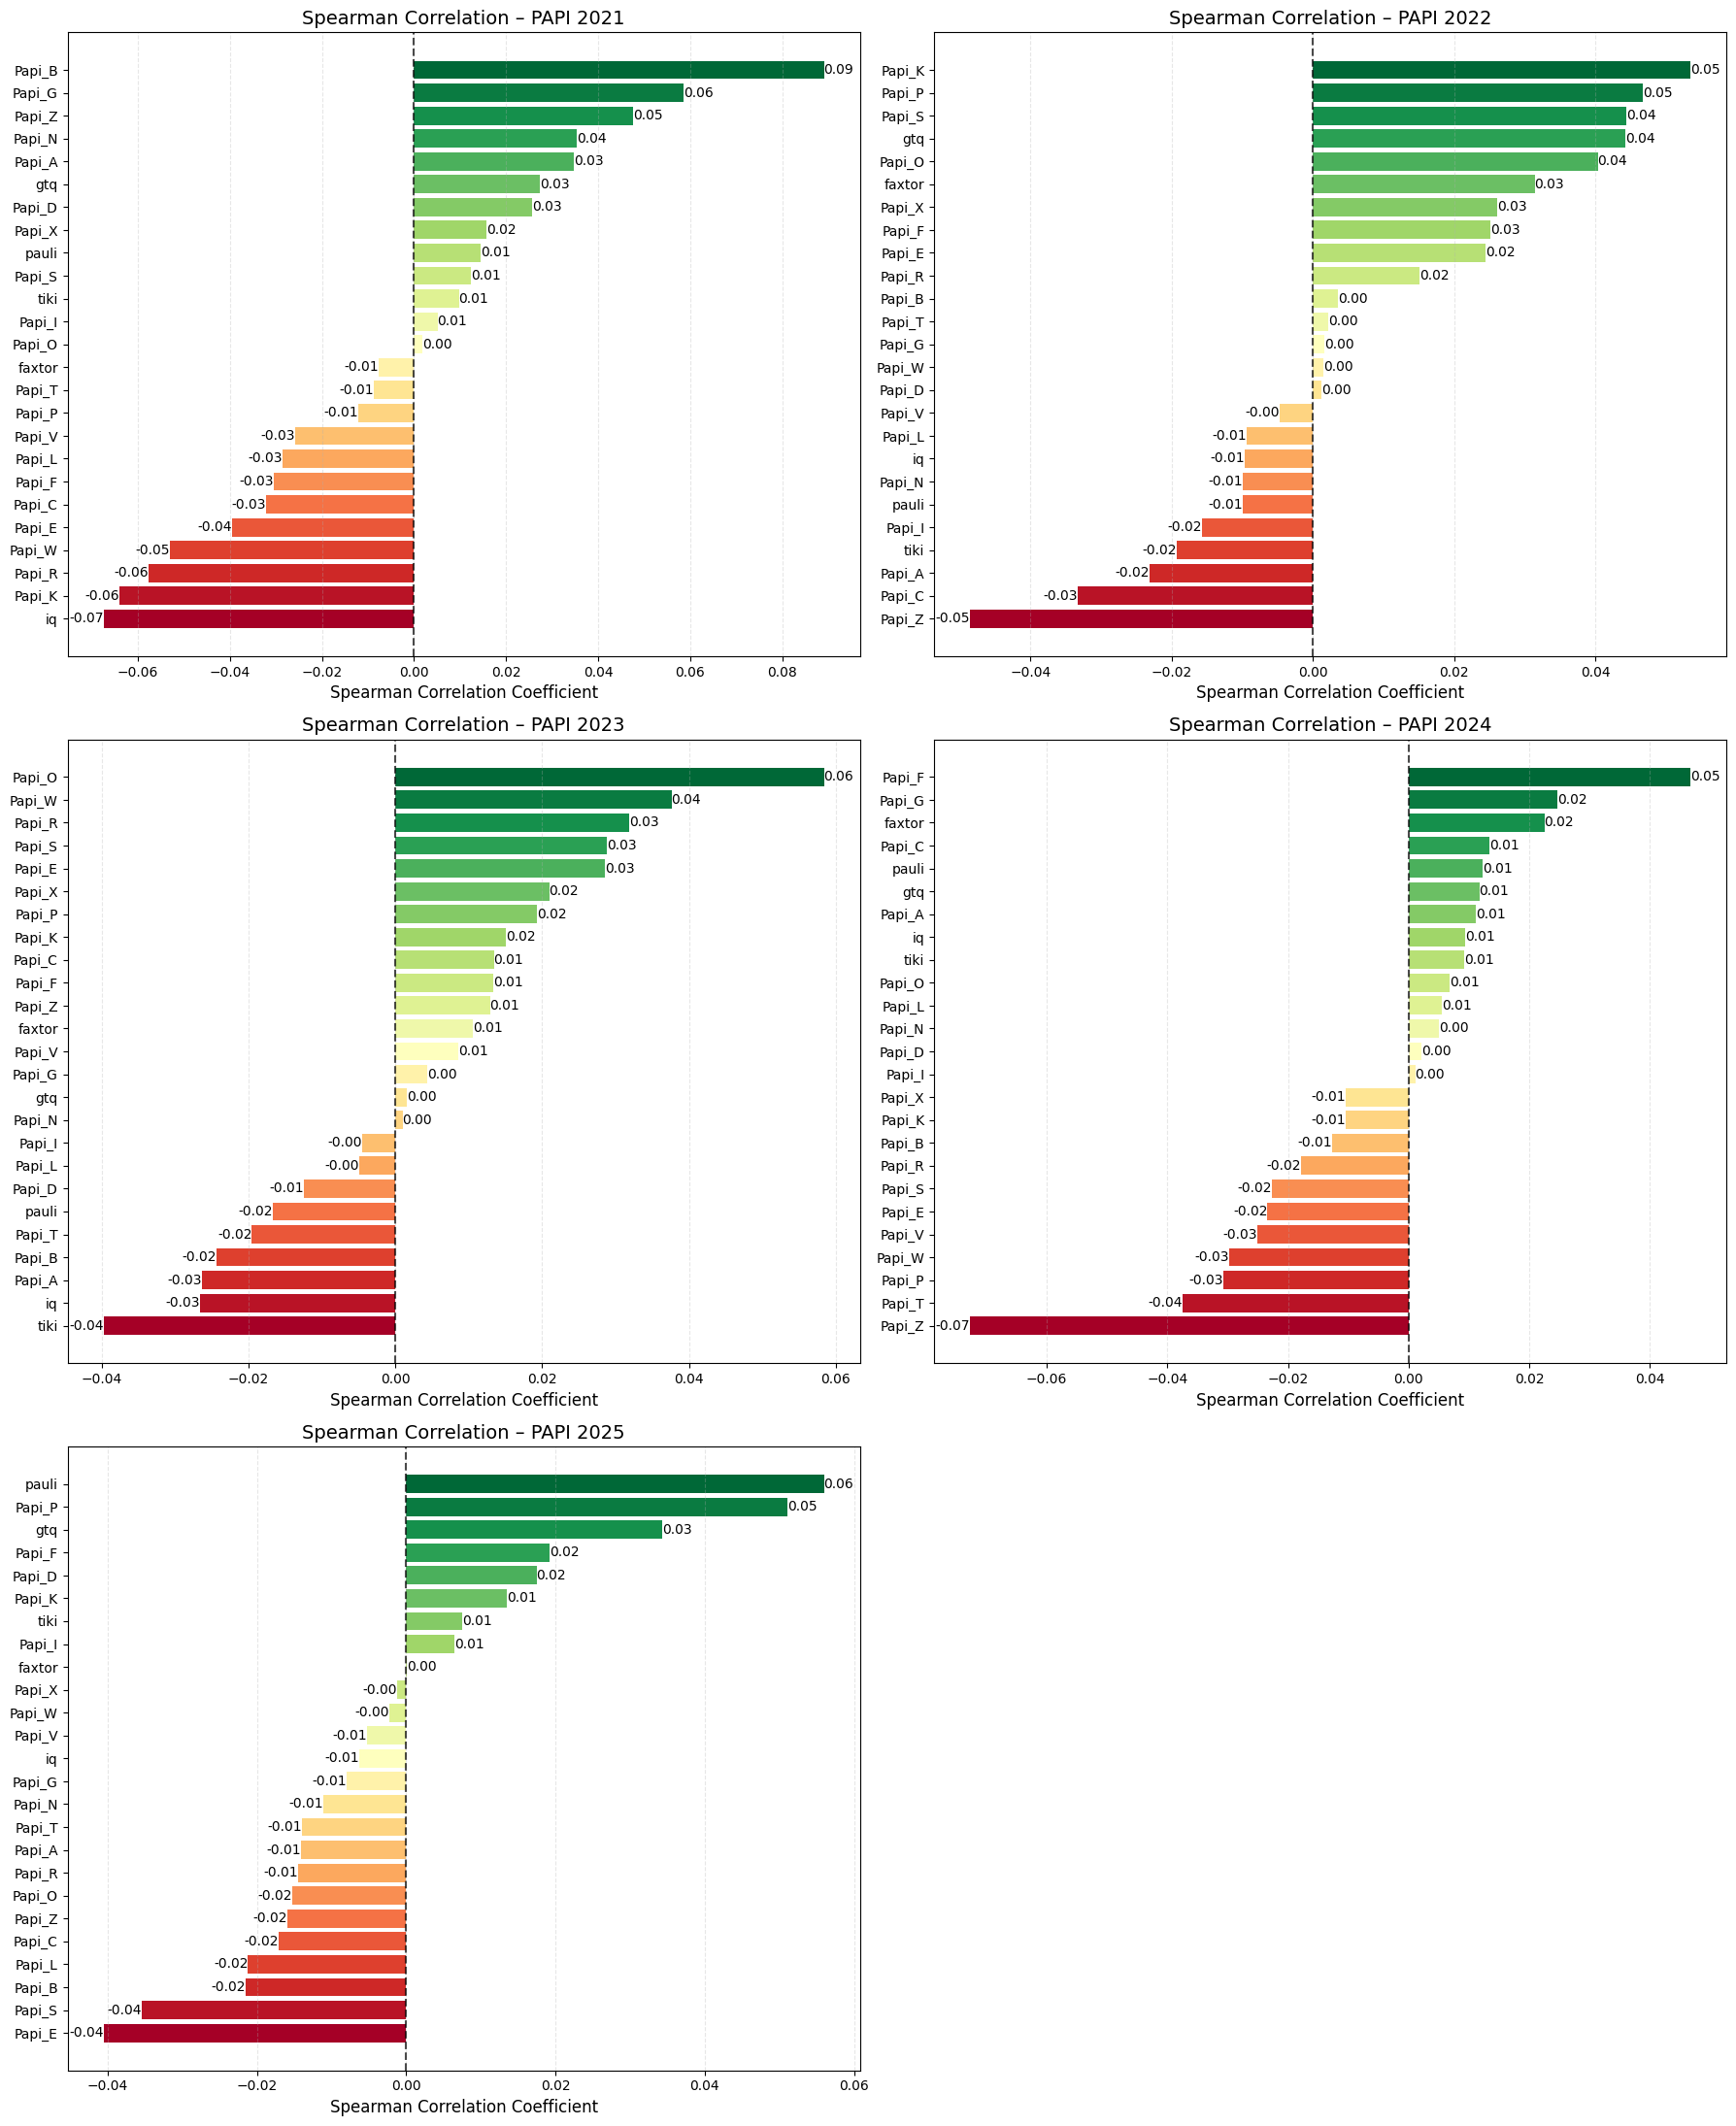

In [ ]:
# =============================================================================
# SPEARMAN CORRELATION PLOTS FOR PAPI (2021–2025) – 3×2 GRID (REYEGR)
# =============================================================================

import matplotlib.pyplot as plt
import numpy as np

papi_scales = [
    'Papi_A','Papi_B','Papi_C','Papi_D','Papi_E','Papi_F','Papi_G','Papi_I',
    'Papi_K','Papi_L','Papi_N','Papi_O','Papi_P','Papi_R','Papi_S','Papi_T',
    'Papi_V','Papi_W','Papi_X','Papi_Z',
    'pauli','faxtor','tiki','gtq','iq'
]


def plot_papi_spearman_all_years(dfs, papi_scales):

    fig, axes = plt.subplots(3, 2, figsize=(18, 22))
    axes = axes.flatten()

    for idx, (df, year) in enumerate(dfs):

        # Hitung Spearman correlation
        corr = df[papi_scales + ['rating']].corr(method='spearman')['rating'].sort_values(ascending=False)
        corr = corr.drop('rating')

        ax = axes[idx]

        # warna "reyegr" (red → yellow → green)
        colors = plt.cm.RdYlGn(np.linspace(0, 1, len(corr)))[::-1]

        bars = ax.barh(corr.index, corr.values, color=colors)
        ax.set_title(f"Spearman Correlation {year}", fontsize=14)
        ax.set_xlabel("Spearman Correlation Coefficient", fontsize=12)

        # garis x=0
        ax.axvline(x=0, color='black', linestyle='--', alpha=0.7)

        ax.grid(axis='x', linestyle='--', alpha=0.3)
        ax.invert_yaxis()

        # label nilai korelasi
        for bar, val in zip(bars, corr.values):
            ax.text(
                bar.get_width() + (0.0 if val > 0 else -0.0),
                bar.get_y() + bar.get_height() / 2,
                f"{val:.2f}",
                va='center',
                ha='left' if val > 0 else 'right',
                fontsize=10
            )

    # kosongkan subplot terakhir jika tahun < 6
    for j in range(len(dfs), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()



# =============================================================================
# JALANKAN
# =============================================================================

dfs = [
    (full_data_2021, 2021),
    (full_data_2022, 2022),
    (full_data_2023, 2023),
    (full_data_2024, 2024),
    (full_data_2025, 2025),
]

# Tambahkan is_high
for df, _ in dfs:
    df['is_high'] = (df['rating'] == 5).astype(int)

plot_papi_spearman_all_years(dfs, papi_scales)


C:\Users\fajar\AppData\Local\Temp\ipykernel_13712\3901517763.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\fajar\AppData\Local\Temp\ipykernel_13712\3901517763.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\fajar\AppData\Local\Temp\ipykernel_13712\3901517763.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\fajar\AppData\Local\Temp\ipykernel_13712\3901517763.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `h

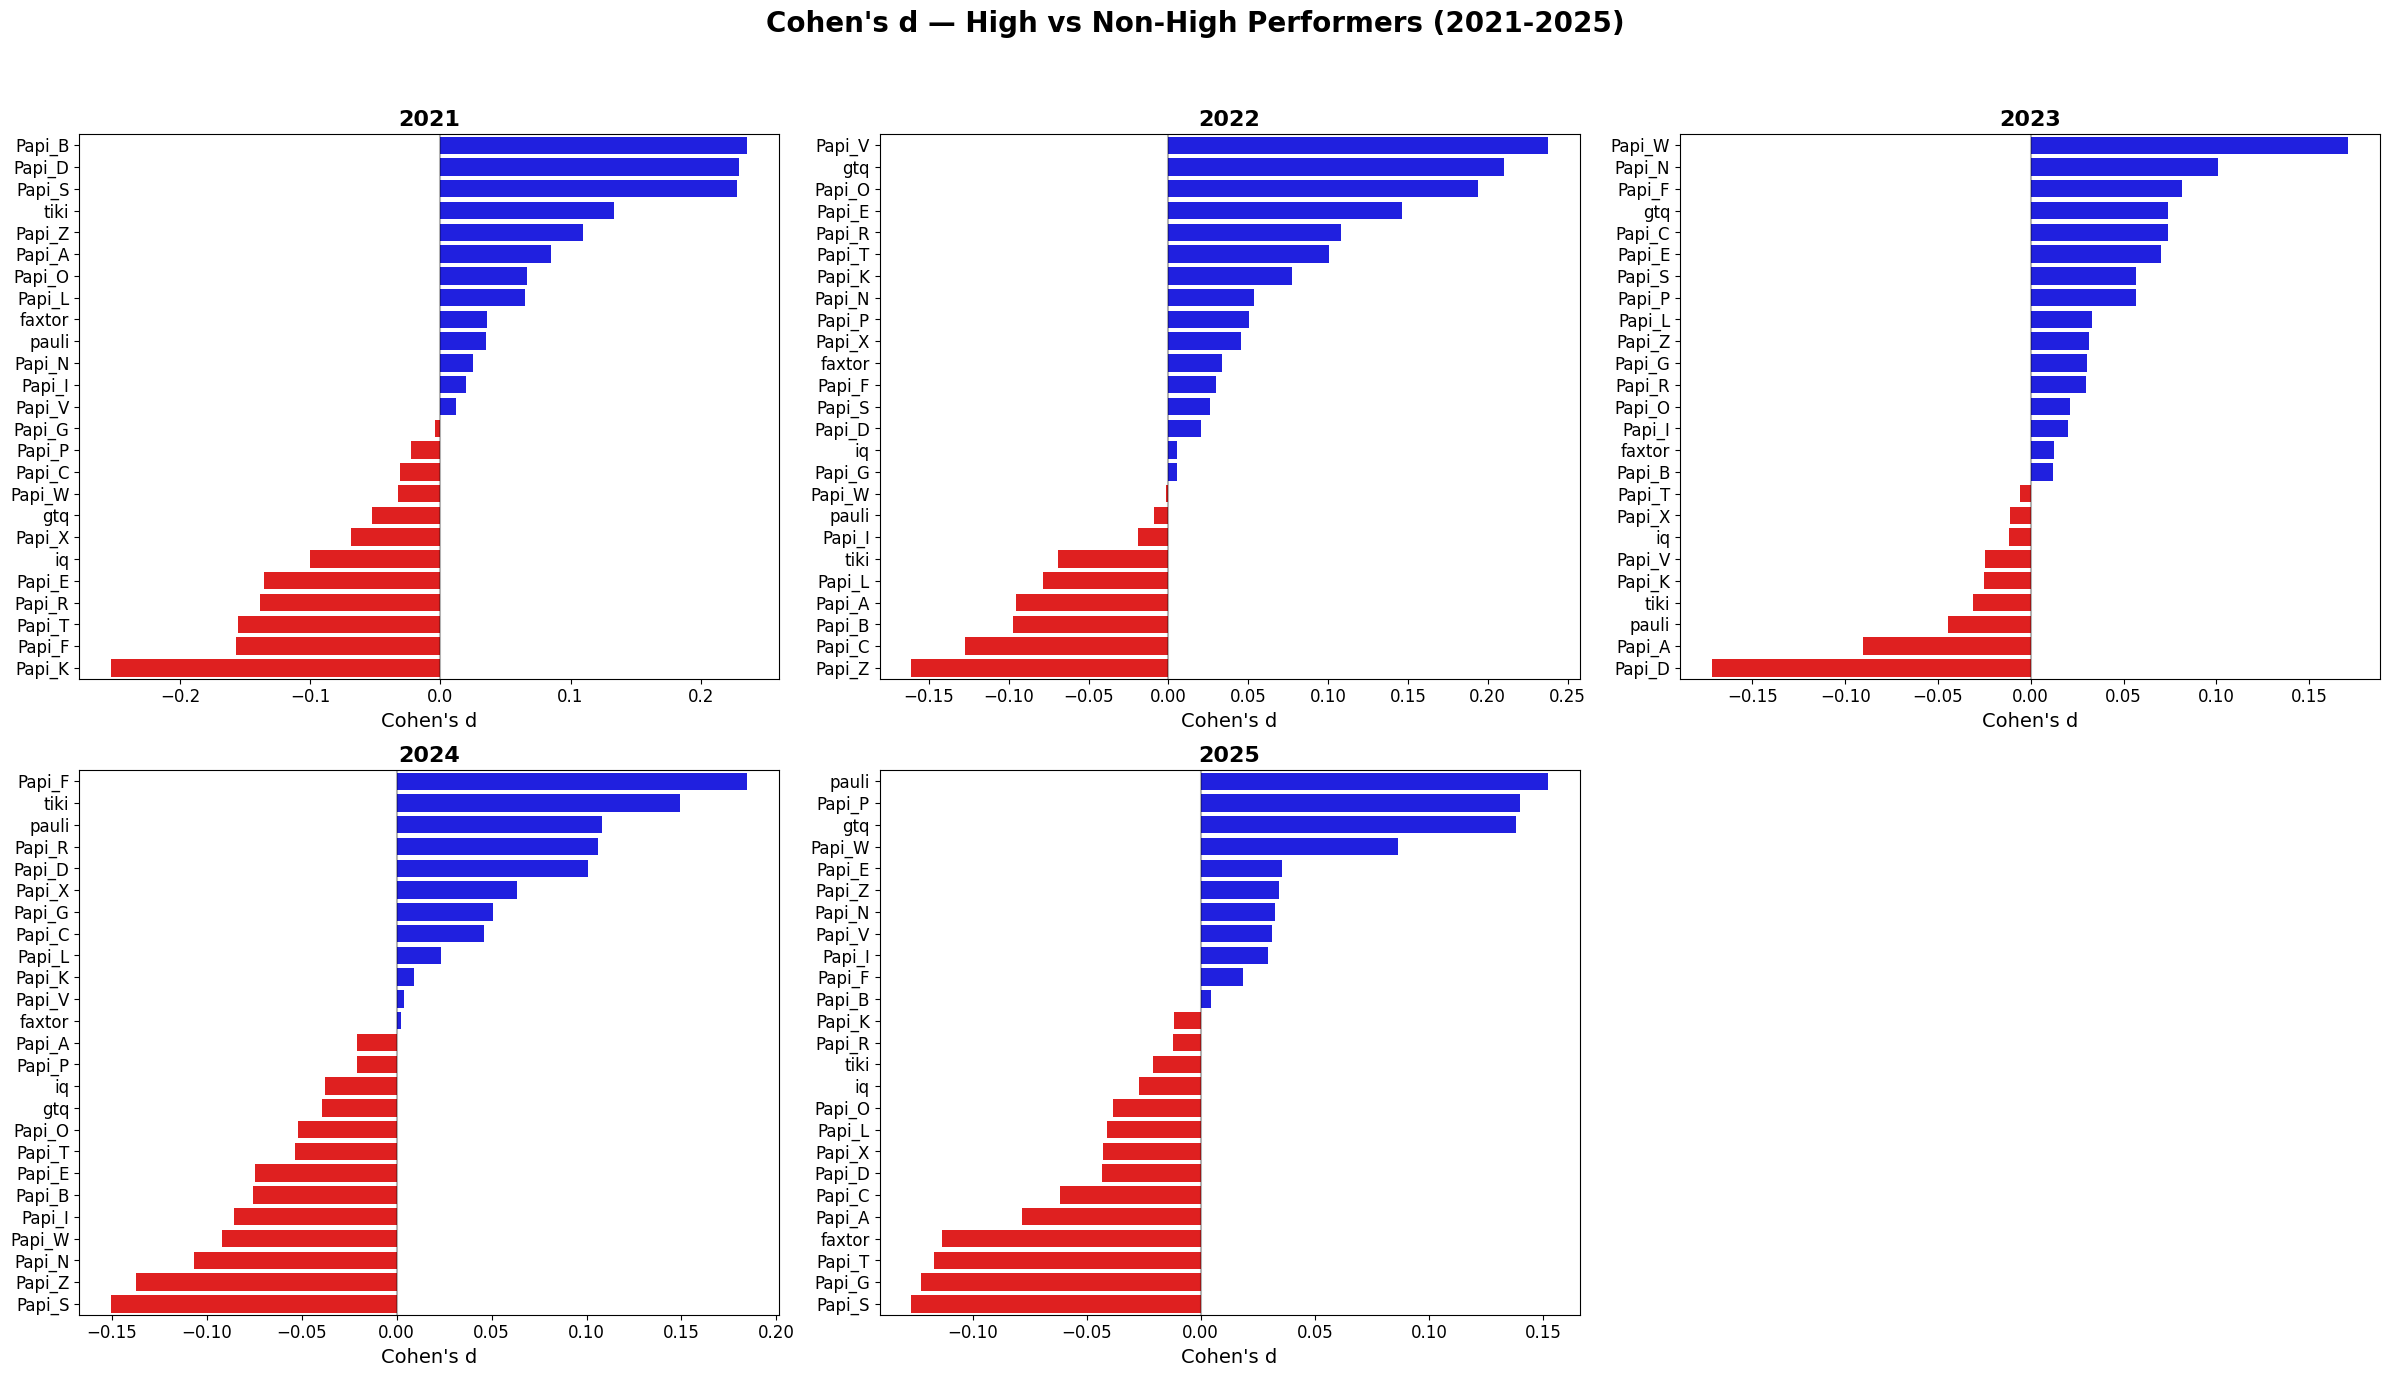

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ====================================================
# 1. List variabel psikometri
# ====================================================
psychometric_vars = [
    'Papi_A','Papi_B','Papi_C','Papi_D','Papi_E','Papi_F','Papi_G','Papi_I',
    'Papi_K','Papi_L','Papi_N','Papi_O','Papi_P','Papi_R','Papi_S','Papi_T',
    'Papi_V','Papi_W','Papi_X','Papi_Z',
    'pauli','faxtor','tiki','gtq','iq'
]

# ====================================================
# 2. Fungsi Cohen's d
# ====================================================
def cohens_d(group1, group2):
    mean1, mean2 = np.mean(group1), np.mean(group2)
    pooled_sd = np.sqrt(((len(group1)-1)*np.var(group1) + 
                         (len(group2)-1)*np.var(group2)) / 
                         (len(group1)+len(group2)-2))
    return (mean1 - mean2) / pooled_sd

# ====================================================
# 3. Data dan figure
# ====================================================
dfs = [
    (full_data_2021, 2021),
    (full_data_2022, 2022),
    (full_data_2023, 2023),
    (full_data_2024, 2024),
    (full_data_2025, 2025),
]

fig, axes = plt.subplots(2, 3, figsize=(24, 14))
axes = axes.flatten()  # Flatten untuk iterasi lebih mudah

for ax, (df, year) in zip(axes, dfs):
    df['is_high'] = (df['rating'] == 5).astype(int)
    
    # Hitung Cohen's d per variabel
    results = []
    for var in psychometric_vars:
        high = df[df['is_high'] == 1][var]
        low  = df[df['is_high'] == 0][var]
        d = cohens_d(high, low)
        results.append([var, d])
    
    core_df = pd.DataFrame(results, columns=['Variable', 'Cohen_d'])
    
    # Urutkan dari nilai tertinggi
    core_df_sorted = core_df.sort_values(by='Cohen_d', ascending=False)
    
    # Barplot horizontal
    sns.barplot(
        x='Cohen_d', y='Variable', data=core_df_sorted,
        palette=['red' if x < 0 else 'blue' for x in core_df_sorted['Cohen_d']],
        ax=ax
    )
    ax.axvline(0, color='black', linestyle='-', alpha=0.3)
    ax.set_title(f"{year}", fontsize=16, fontweight='bold')
    ax.set_xlabel("Cohen's d", fontsize=14)
    ax.set_ylabel("")
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12)

# Hapus subplot ke-6 jika tidak digunakan
if len(dfs) < len(axes):
    for i in range(len(dfs), len(axes)):
        fig.delaxes(axes[i])

plt.suptitle("Cohen's d — High vs Non-High Performers (2021-2025)", fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


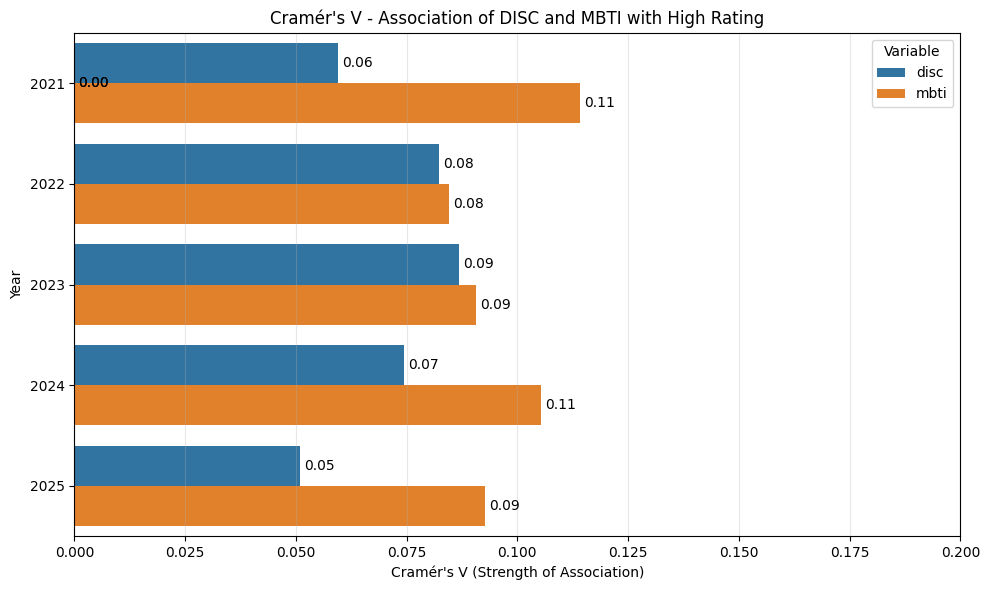

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# ====================================================
# 1. Definisikan fungsi Cramér's V
# ====================================================
def cramers_v(x, y):
    """Hitung Cramér's V antara dua variabel kategori"""
    contingency = pd.crosstab(x, y)
    chi2, p, dof, ex = chi2_contingency(contingency, correction=False)
    n = contingency.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency.shape)-1)))

# ====================================================
# 2. Variabel kategori
# ====================================================
categorical_vars = ['disc', 'mbti']
dfs = [
    (full_data_2021, 2021),
    (full_data_2022, 2022),
    (full_data_2023, 2023),
    (full_data_2024, 2024),
    (full_data_2025, 2025),
]

# ====================================================
# 3. Hitung Cramér's V untuk tiap tahun dan tiap variabel
# ====================================================
results = []

for df, year in dfs:
    df['is_high'] = (df['rating'] == 5).astype(int)
    for var in categorical_vars:
        v = cramers_v(df[var], df['is_high'])
        results.append([year, var, v])

cv_df = pd.DataFrame(results, columns=['Year', 'Variable', 'Cramers_V'])

# ====================================================
# 4. Visualisasi Horizontal + angka di bar
# ====================================================
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    y='Year', 
    x='Cramers_V', 
    hue='Variable', 
    data=cv_df, 
    palette=['#1f77b4', '#ff7f0e'],
    orient='h'
)

plt.title("Cramér's V - Association of DISC and MBTI with High Rating")
plt.xlabel("Cramér's V (Strength of Association)")
plt.ylabel("Year")
plt.xlim(0, 0.2)
plt.grid(axis='x', alpha=0.3)
plt.legend(title='Variable')

# Tambahkan angka di atas bar
for p in bars.patches:
    width = p.get_width()
    bars.annotate(
        f'{width:.2f}', 
        (width, p.get_y() + p.get_height()/2),
        ha='left', va='center',
        fontsize=10,
        xytext=(3, 0),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()


In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Misal df adalah dataframe kamu
df = df.copy()

# Encode kolom kategori
categorical_cols = ['disc', 'mbti']  # tambahkan kolom kategori lainnya jika ada
for col in categorical_cols:
    df[col] = df[col].astype(str)  # pastikan semua string
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].fillna('NA'))  # handle NaN

# Isi NaN pada numerik dengan median
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove('is_high')  # jangan ikut target
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Pisah X dan y
X = df.drop(columns=['employee_id','is_high','year'])
y = df['is_high']

# Fit Random Forest
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X, y)

# Feature importance
importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
importance = importance.sort_values(by='importance', ascending=False)
print(importance)


   feature  importance
0   rating    0.753957
21   pauli    0.017393
22  faxtor    0.014696
26     gtq    0.014117
25      iq    0.013426
24    mbti    0.010923
13  Papi_P    0.010413
16  Papi_T    0.010327
15  Papi_S    0.009054
19  Papi_X    0.008578
11  Papi_N    0.008530
23    disc    0.008370
17  Papi_V    0.008122
5   Papi_E    0.008118
14  Papi_R    0.008060
9   Papi_K    0.007812
6   Papi_F    0.007687
18  Papi_W    0.007638
7   Papi_G    0.007564
1   Papi_A    0.007528
2   Papi_B    0.007496
20  Papi_Z    0.007415
27    tiki    0.007274
12  Papi_O    0.007248
8   Papi_I    0.007234
3   Papi_C    0.007081
10  Papi_L    0.006992
4   Papi_D    0.006945


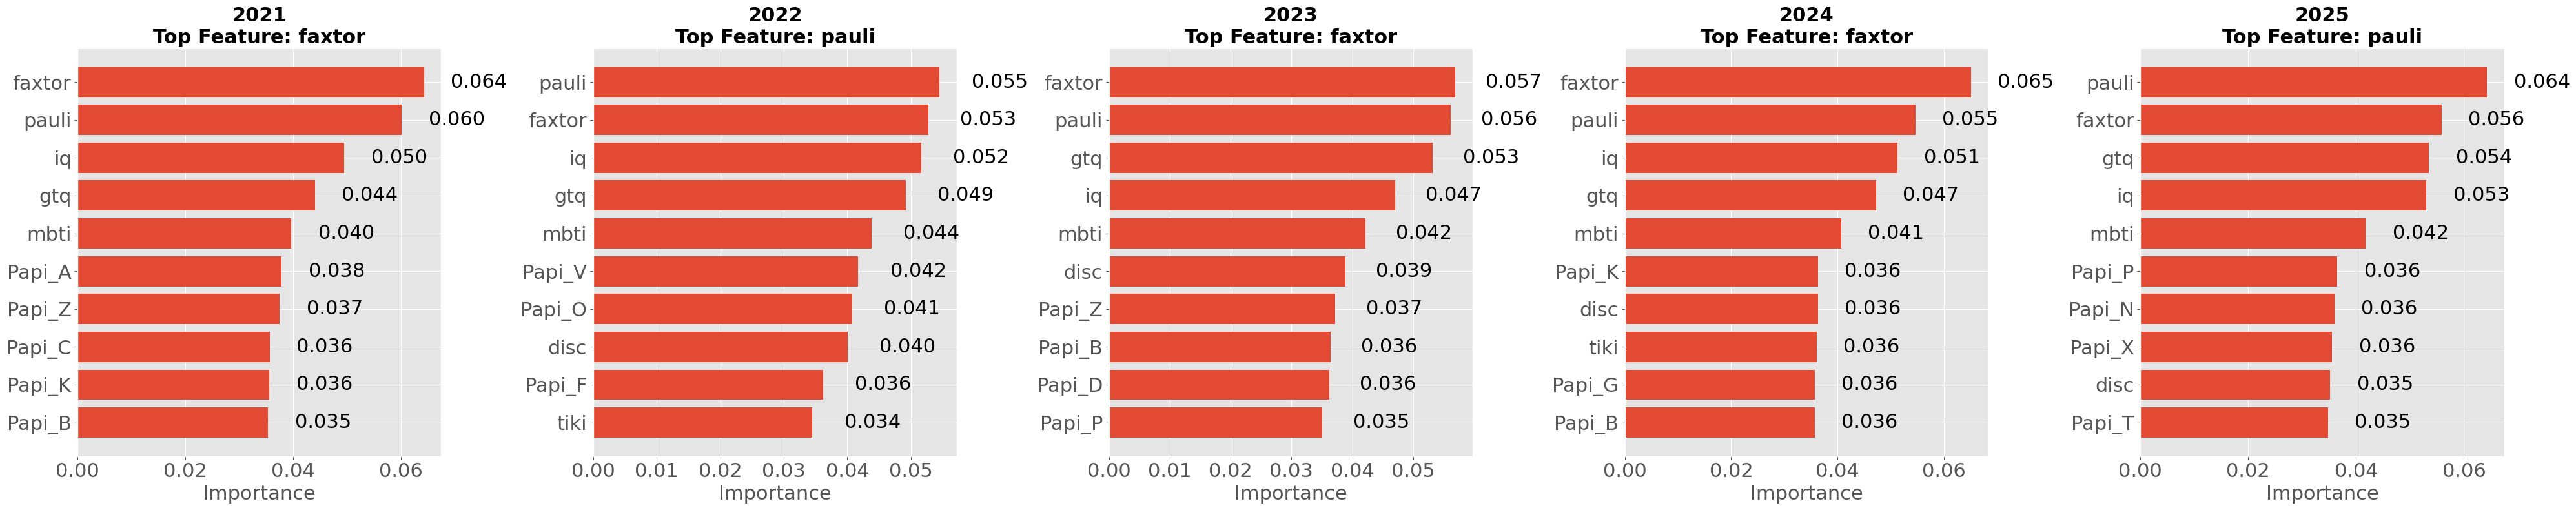

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# List dataframe dan tahunnya
dfs = [
    (full_data_2021, 2021),
    (full_data_2022, 2022),
    (full_data_2023, 2023),
    (full_data_2024, 2024),
    (full_data_2025, 2025),
]

# Siapkan figure dengan 5 subplot
fig, axes = plt.subplots(1, 5, figsize=(40,8))

for i, (df, year) in enumerate(dfs):
    df = df.copy()
    
    # Encode kategori
    categorical_cols = ['disc', 'mbti']  # tambahkan kategori lain jika ada
    for col in categorical_cols:
        df[col] = df[col].astype(str)
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].fillna('NA'))
    
    # Isi NaN numerik
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    numeric_cols.remove('is_high')
    if 'rating' in numeric_cols:
        numeric_cols.remove('rating')
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
    
    # Pisah X dan y, hapus rating dari X
    X = df.drop(columns=['employee_id','is_high','year','rating'])
    y = df['is_high']
    
    # Fit Random Forest
    rf = RandomForestClassifier(n_estimators=500, random_state=42)
    rf.fit(X, y)
    
    # Ambil fitur paling berpengaruh
    importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
    top10 = importance.sort_values(by='importance', ascending=False).head(10)
    top_feature = top10.iloc[0]
    
    # Bar plot dengan warna default
    bars = axes[i].barh(top10['feature'], top10['importance'])
    axes[i].invert_yaxis()
    
    # Set semua teks menjadi fontsize 22
    axes[i].set_title(f"{year}\nTop Feature: {top_feature['feature']}", fontsize=22, fontweight='bold')
    axes[i].set_xlabel("Importance", fontsize=22)
    axes[i].tick_params(axis='x', labelsize=22)
    axes[i].tick_params(axis='y', labelsize=22)
    
    # Tampilkan nilai di atas batang
    for bar in bars:
        width = bar.get_width()
        axes[i].text(width + 0.005, bar.get_y() + bar.get_height()/2,
                     f"{width:.3f}", va='center', fontsize=22)

plt.tight_layout()
plt.show()
